In [1]:
from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
nlp = spacy.load('en')

### Accessing Tokens and Spans

In [4]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}


text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]


pd.DataFrame(map(info, [token,span,document]))

,__str__,type
0,spaCy,<type 'spacy.tokens.token.Token'>
1,spaCy excels at,<type 'spacy.tokens.span.Span'>
2,spaCy excels at large-scale information extrac...,<type 'spacy.tokens.doc.Doc'>


### Sentence boundary detection

In [5]:
print document.sents
for sent in document.sents:
    print sent

spaCy excels at large-scale information extraction tasks. 

It's written from the ground up in carefully memory-managed Cython.


### Tokenization

In [6]:
for token in document:
    print token

spaCy
excels
at
large
-
scale
information
extraction
tasks
.


It
's
written
from
the
ground
up
in
carefully
memory
-
managed
Cython
.


### Morphological decomposition

In [7]:
token = document[13]
print "text: %s" % token.text
print "suffix: %s" % token.suffix_ 
print "lemma: %s" % token.lemma_

text: written
suffix: ten
lemma: write


### Part of Speech Tagging

In [8]:
#Part of speech and Dependency tagging
attrs = map(lambda token: {
                     "token":token
                   , "part of speech":token.pos_
                   , "Dependency" : token.dep_}
                    , document)
pd.DataFrame(attrs)

,Dependency,part of speech,token
0,nsubj,NOUN,spaCy
1,ROOT,VERB,excels
2,prep,ADP,at
3,amod,ADJ,large
4,punct,PUNCT,-
5,compound,NOUN,scale
6,compound,NOUN,information
7,compound,NOUN,extraction
8,pobj,NOUN,tasks
9,punct,PUNCT,.


### Noun Chunking

In [9]:
print "noun chunks: {}".format(list(document.noun_chunks))

noun chunks: [spaCy, large-scale information extraction tasks, It, the ground, Cython]


### Named Entity Recognition

In [10]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print "entities: {}".format(ents)

entities: [(Cython, u'ORG')]


### Text Similarity (Using Word Vectors)

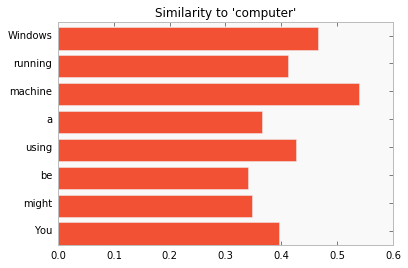

In [11]:
#document, span, and token similarity
def plot_similarities(similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks([i + .5 for i in index])
    ax.set_yticklabels(document2)
    ax.grid()
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = map(lambda token: token.similarity(computer),document2)
plot_similarities(similarities, computer)




    

In [ ]:
!pip install spacy
!python -m spacy.en.download

In [7]:
from boto.s3.connection import S3Connection
from boto.s3.key import Key

def get_bucket():
    access=os.environ['SECRET_ENV_AWS_ACCESS_KEY_SHARED']
    secret=os.environ['SECRET_ENV_AWS_SECRET_KEY_SHARED']
    customer = os.environ['SECRET_ENV_CUSTOMER']
    conn = S3Connection(access,secret)
    b = conn.get_bucket('ds-cloud-'+customer+'-shared',validate=False)
    return b
key = 'Spacy-Workflow'
s3_bucket = get_bucket()
payload = s3_bucket.get_key(key)
payload.get_contents_to_filename('Spacy-Workflow.svg')